In [72]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [73]:
# parameters
N = 100  # it takes a lot of iterations for the locations close to pi.  

In [74]:
# value of x (as a differentiable tensor)
x = np.linspace(0, 3*np.pi/4, 100)
f = np.zeros_like(x)
dfdx = np.zeros_like(x)

for i in range(len(x)):
    xp = torch.tensor(x[i], dtype=torch.float64, requires_grad=True)

    # initial guess for f
    fp = xp.clone()

    # fixed-point iteration
    for _ in range(N):
        fp = torch.sin(xp + fp)

    # compute df/dx
    fp.backward()
    
    f[i] = fp.item()
    dfdx[i] = xp.grad.item()

Text(0.5, 1.0, 'df/dx')

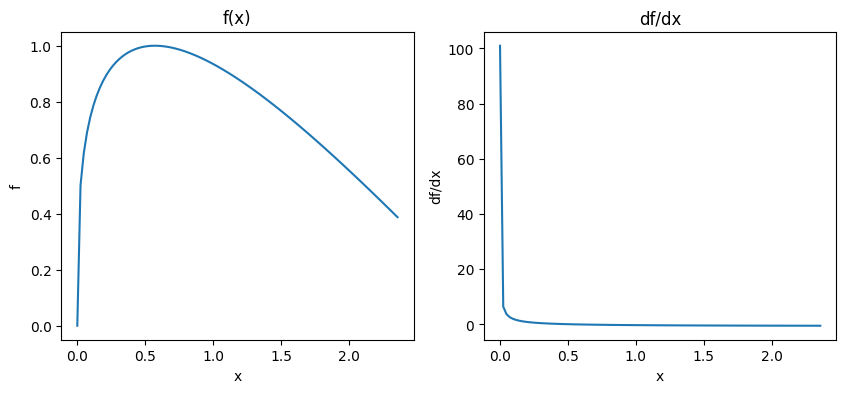

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# left plot
axs[0].plot(x, f)
axs[0].set_xlabel("x")
axs[0].set_ylabel("f")
axs[0].set_title("f(x)")

# right plot
axs[1].plot(x, dfdx)
axs[1].set_xlabel("x")
axs[1].set_ylabel("df/dx")
axs[1].set_title("df/dx")
